In [1]:
import pystan


In [2]:
!pip install arviz

In [3]:
import arviz

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
df = pd.read_csv('/content/data.csv')

In [8]:
df

,data,parcent
0,1,69.00
1,2,68.58
2,3,68.69
3,4,68.47
4,5,68.39
5,6,67.99
6,7,67.64
7,8,67.63
8,9,67.67
9,10,67.71


In [10]:
x = df.iloc[:, 0] #データ数
print(x)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: data, dtype: int64


In [11]:
y = df.iloc[:, 1] #年齢

In [12]:
y

0     69.00
1     68.58
2     68.69
3     68.47
4     68.39
5     67.99
6     67.64
7     67.63
8     67.67
9     67.71
10    67.73
11    67.95
Name: parcent, dtype: float64

In [23]:
sm = pystan.StanModel(file = '/content/reg2.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5abc5da9cf168d5bd404c88aac249f5d NOW.


In [20]:
n = len(x)

In [17]:
x_pred = [i for i in range(0,51)]
x_pred = np.array(x_pred)
x_pred = pd.Series(x_pred)

In [18]:
x_pred

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
dtype: int64

In [19]:
print(f'{x.shape}')
print(f'{y.shape}')
print(f'{x_pred.shape}')


(12,)
(12,)
(51,)


In [26]:
fit = sm.sampling(
    data = dict(
        N = n,
        x = x,
        y = y,
        N_pred = len(x_pred),
        x_pred = x_pred
        ),
    seed = 1234,
    iter = 5000,
    warmup = 1000,
    chains = 4)

Inference for Stan model: anon_model_5abc5da9cf168d5bd404c88aac249f5d.
4 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=16000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta_0       68.86  2.6e-3   0.19  68.48  68.74  68.86  68.98  69.24   5142    1.0
beta_1       -0.11  3.6e-4   0.03  -0.16  -0.13  -0.11   -0.1  -0.06   5272    1.0
sigma          0.3  1.2e-3   0.08   0.19   0.24   0.28   0.34   0.51   5100    1.0
mu_pred[1]   68.86  2.6e-3   0.19  68.48  68.74  68.86  68.98  69.24   5142    1.0
mu_pred[2]   68.75  2.3e-3   0.17  68.41  68.64  68.75  68.85  69.08   5272    1.0
mu_pred[3]   68.63  2.0e-3   0.15  68.34  68.54  68.63  68.72  68.92   5506    1.0
mu_pred[4]   68.52  1.6e-3   0.13  68.26  68.44  68.52   68.6  68.77   5945    1.0
mu_pred[5]    68.4  1.3e-3   0.11  68.19  68.34   68.4  68.47  68.62   6819    1.0
mu_pred[6]   68.29  1.0e-3    0.1   68.1  68.23  68.29  68.35  

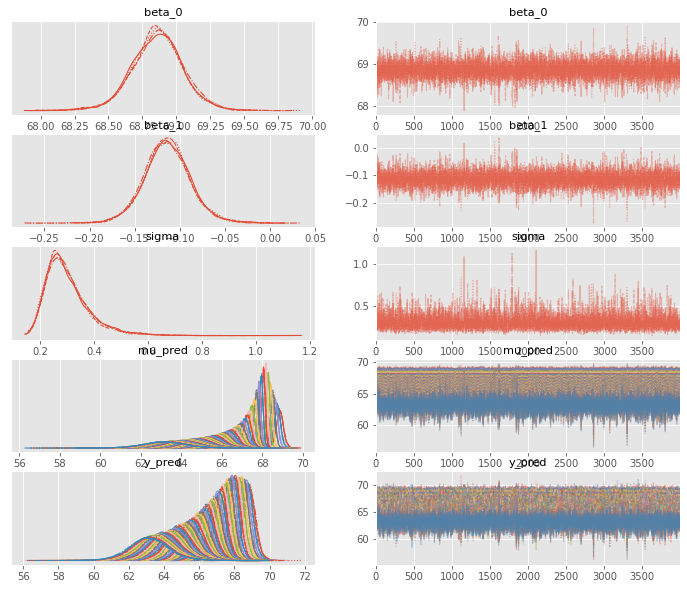

In [27]:
arviz.plot_trace(fit)
print(fit)

In [28]:
temp = [i for i in range(0,51)]
temp2 = []
for i in range(0,51):
  a = 68.86 + (-0.11 * temp[i])
  temp2.append(a)

<function matplotlib.pyplot.figure>

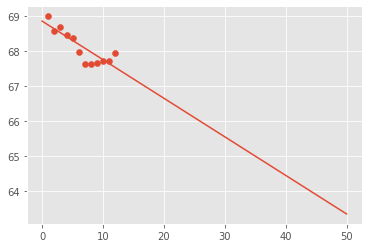

In [29]:
plt.scatter(x=df['data'],y=df['parcent'])
plt.plot(temp,temp2)
plt.figure

Text(0, 0.5, 'percent')

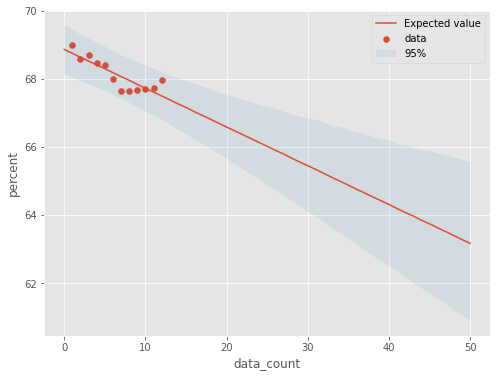

In [32]:
reg_95 = np.quantile(fit['y_pred'],axis=0,q=[0.025,0.975]) #事後予測分布
fig,axes = plt.subplots(figsize=(8,6))
axes.scatter(x=df['data'],y=df['parcent'],label='data')
axes.plot(x_pred,np.average(fit['y_pred'], axis=0),label='Expected value')
axes.fill_between(x_pred,reg_95[0],reg_95[1],alpha=0.1,label='95%')
axes.legend(loc='best')
axes.set_xlabel('data_count')
axes.set_ylabel('percent')